In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
seoul = gpd.read_file('E:/21KDT-Project-master/spatial_analysis-master/data/TL_SCCO_SIG.shp', encoding = 'EUC-KR')
# 숫자가 깨져서 'encoding = 'EUC-KR'을 사용함.
seoul.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.058 1952633.250, 964875.565 1..."


In [2]:
type(seoul)

geopandas.geodataframe.GeoDataFrame

In [3]:
dms = {'DMS 지역명': ['초안산근린공원', '쌍문3동주민센터', '우이3교 하수과창고', '오패산공원',
                  '마들로1가길','공릉1동주민센터','불광보건분소', '은평구보건소',
                  '석관빗물펌프장', '성북구보건소', '중랑캠핑숲', '샘터공원',
                  '북가좌1동주민센터', '서대문구청제1별관', '연지근린공원', '지봉골공원',
                  '휘경빗물펌프장', '청량리동주민센터', '봉제산근린공원', '강서구보건소',
                  '마포유수지', '은행나무어린이공원', '남산골한옥마을', '다산동주민센터',
                  '성동구민종합체육센터', '성동구보건소', '용산빗물펌프장', '보광동주민센터',
                  '자양유수지공영주차장', '중곡3동마을공원', '동명근린공원', '강동구보건소',
                  '목동도심소공원', '앞산어린이공원', '신길동공원', '여의도샛강생태공원',
                  '흑석빗물펌프장', '동작문화복지센터', '방배빗물펌프장', '서초1동주민센터',
                  '아랫반마을펌프장', '강남구보건소', '몽촌빗물펌프장', '가락근린공원',
                  '금강수목원아파트', '세화어린이집', '금천구보건소', '독산보건분소',
                  '남부어린이공원','백설어린이공원'],
       '위도': [37.648139346723, 37.649690910806, 37.637969728804, 37.622826998198,
              37.618248115653, 37.625743383509, 37.622153314841, 37.602893180331,
              37.614115579919, 37.603480477553, 37.605533355185, 37.573678335878,
              37.576226418617, 37.582258950065, 37.576649621826, 37.579496596420,
              37.589973200665, 37.587207279098, 37.542079197693, 37.550603179310,
              37.540802033143, 37.565122374955, 37.559688978127, 37.555056119716,
              37.546777303834, 37.568005352565, 37.533110075684, 37.527026645711,
              37.529978048709, 37.570559378088, 37.561179983212, 37.530084481365,
              37.543406032807, 37.527069275261, 37.507843469735, 37.519373807001,
              37.509257710416, 37.504598638437, 37.491133355791, 37.491036211305,
              37.464549125236, 37.517346017930, 37.524403870462, 37.499116872051,
              37.489106234186, 37.487940453903, 37.457618040611, 37.474472348583,
              37.485688728667, 37.476951288753],
       '경도': [127.041257401871, 127.027779817214, 127.035003278580, 127.033463800193,
              127.067858501825, 127.073977424577, 126.927827209231, 126.929030655787,
              127.065382417166, 127.039235155787, 127.112275701818, 127.083135701803,
              126.908197477306, 126.937343878524, 127.000321494399, 127.014479586462,
              127.069459517154, 127.047143732496, 126.851355878505, 126.867879125073,
              126.941420752395, 126.922354378516, 126.994072663170, 127.008217071106,
              127.043877201789, 127.032856417143, 126.958294817126, 127.000233393841,
              127.077339986437, 127.084878239893, 127.164516524545, 127.125427917125,
              126.877622380662, 126.858519432467, 126.915071901770, 126.921896063150,
              126.963334793832, 126.941026011179, 126.986723602398, 127.019279802398,
              127.104416348421, 127.041693625684, 127.109756255868, 127.124744525165,
              126.832345563779, 126.886543671196, 126.895100056346, 126.902173148426,
              126.920593333086, 126.953668925155],
}

dms = pd.DataFrame(dms)
dms.head()

,DMS 지역명,위도,경도
0,초안산근린공원,37.648139,127.041257
1,쌍문3동주민센터,37.649691,127.027780
2,우이3교 하수과창고,37.637970,127.035003
3,오패산공원,37.622827,127.033464
4,마들로1가길,37.618248,127.067859


In [4]:
from shapely.geometry import Point, Polygon, LineString
dms['경도'] = dms['경도'].astype(float)
dms['위도'] = dms['위도'].astype(float)
dms['geometry'] = dms.apply(lambda row : Point([row['경도'], row['위도']]), axis=1)
dms = gpd.GeoDataFrame(dms, geometry='geometry')
dms.head()

,DMS 지역명,위도,경도,geometry
0,초안산근린공원,37.648139,127.041257,POINT (127.04126 37.64814)
1,쌍문3동주민센터,37.649691,127.027780,POINT (127.02778 37.64969)
2,우이3교 하수과창고,37.637970,127.035003,POINT (127.03500 37.63797)
3,오패산공원,37.622827,127.033464,POINT (127.03346 37.62283)
4,마들로1가길,37.618248,127.067859,POINT (127.06786 37.61825)


In [5]:
print(seoul.crs)
print(dms.crs)

# 둘다 crs가 없으므로 seoul에다가 crs를 넣어주고 그다음에 dms를 seoul crs로 맞춰준다.
# EPSG4326(WGS84) : 위경도, 기본좌표계 (dms 파일용)
# EPSG5179(TM) : 미터 좌표계 (seoul 파일용)

{}
None


In [6]:
seoul.crs = {'init':'epsg:5179'}
seoul.crs

{'init': 'epsg:5179'}

In [7]:
# seoul 데이터의 geometry와 dms 데이터의 geometry다 다르기 때문에 맞춰주어야 한다.

from fiona.crs import from_string
epsg4326 = from_string("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
epsg5179 = from_string("+proj=tmerc +lat_0=38 +lon_0=127.5 +k=0.9996 +x_0=1000000 +y_0=2000000 +ellps=GRS80 +units=m +no_defs")

In [8]:
dms.crs = epsg4326
dms = dms.to_crs(epsg5179)
dms["geometry"].head()

# 'epsg4326' dms 데이터를 'epsg5179' seoul 데이터 형식으로 바꿔주었다. 형식이 안맞으면 에러남.

0    POINT (959531.838 1961060.455)
1    POINT (958343.768 1961238.495)
2    POINT (958974.533 1959934.890)
3    POINT (958830.355 1958255.539)
4    POINT (961863.204 1957733.000)
Name: geometry, dtype: geometry

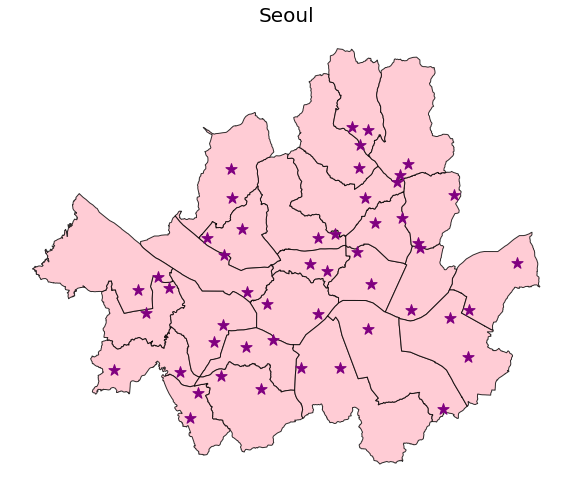

In [9]:
ax = seoul.plot(figsize=(10,10), color = 'pink', edgecolor = 'black', alpha=0.8)
dms.plot(ax=ax, marker='*', color='purple', markersize = 140)
ax.set_title("Seoul", fontsize=20)
ax.set_axis_off()


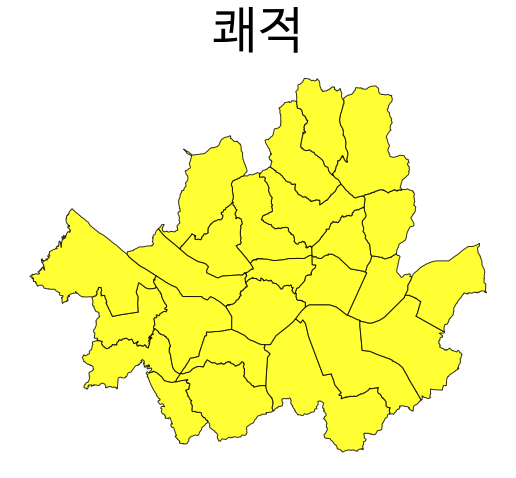

In [10]:
import matplotlib as mat # 한글 깨짐에 사용
mat.rcParams['font.family'] = 'Han Santteut Dotum' 

num = 20
def color(num):
    if 0 <= num <= 250:
        fill_color = 'yellow' 
    elif 251 <= num <= 750:
        fill_color = 'orange'
    elif 751 <= num <= 2250:
        fill_color = 'green'
    elif 2251 <= num <= 5625:
        fill_color = 'blue'
    else:
        fill_color = 'red' #red
    return fill_color

def state(num):
    if 0 <= num <= 250:
        set_title = '쾌적'
    elif 251 <= num <= 750:
        set_title = '관심'
    elif 751 <= num <= 2250:
        set_title = '주의'
    elif 2251 <= num <= 5625:
        set_title = '불쾌'
    else:
        set_title = '심각' #red

    return set_title
        
    

ax = seoul.plot(figsize=(9,9), color = color(num), edgecolor = 'black', label = '쾌적', alpha=0.8)
#dms.plot(ax=ax, marker='^', color=fi_color(num), markersize = 100)
ax.set_title(state(num), fontsize=50)#, loc='right')
ax.set_axis_off() 
plt.show()